In [20]:
%matplotlib inline
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

#### 1. 

In [2]:
df1 = pd.read_csv(r'Downloads/Data_and_description/Part_1.csv')

In [3]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df1.shape

(303, 14)

In [7]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [169]:
clf = tree.DecisionTreeClassifier(criterion='entropy', min_weight_fraction_leaf=0.065)

In [170]:
X = df1[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df1.target

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [172]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.065, presort=False,
                       random_state=None, splitter='best')

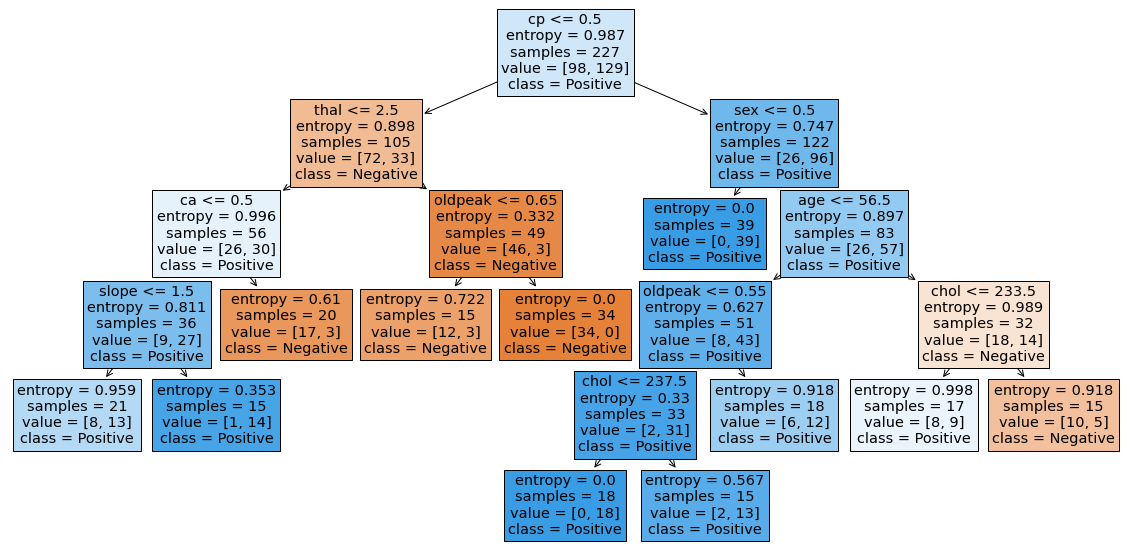

In [173]:
plt.rcParams["figure.figsize"] = (20, 10)
tree.plot_tree(clf, feature_names=list(X), class_names=['Negative', 'Positive'],filled=True);

In [174]:
predictions = clf.predict(X_test)

In [175]:
report = classification_report(y_test, predictions, target_names=['no disease', 'disease'])

In [176]:
print(report)

              precision    recall  f1-score   support

  no disease       0.88      0.88      0.88        40
     disease       0.86      0.86      0.86        36

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [177]:
rfe = RFE(clf, 5)

In [178]:
rfe

RFE(estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy',
                                     max_depth=None, max_features=None,
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.065,
                                     presort=False, random_state=None,
                                     splitter='best'),
    n_features_to_select=5, step=1, verbose=0)

In [179]:
fit = rfe.fit(X, y)

In [180]:
for i in range(len(list(fit.support_))):
    if fit.support_[i]:
        print(list(df1.columns)[i])

age
sex
cp
ca
thal
